In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.linear_model import LogisticRegression

In [4]:
df=pd.read_csv("city_day.csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29531 entries, 0 to 29530
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   City        29531 non-null  object 
 1   Date        29531 non-null  object 
 2   PM2.5       24933 non-null  float64
 3   PM10        18391 non-null  float64
 4   NO          25949 non-null  float64
 5   NO2         25946 non-null  float64
 6   NOx         25346 non-null  float64
 7   NH3         19203 non-null  float64
 8   CO          27472 non-null  float64
 9   SO2         25677 non-null  float64
 10  O3          25509 non-null  float64
 11  Benzene     23908 non-null  float64
 12  Toluene     21490 non-null  float64
 13  Xylene      11422 non-null  float64
 14  AQI         24850 non-null  float64
 15  AQI_Bucket  24850 non-null  object 
dtypes: float64(13), object(3)
memory usage: 3.6+ MB


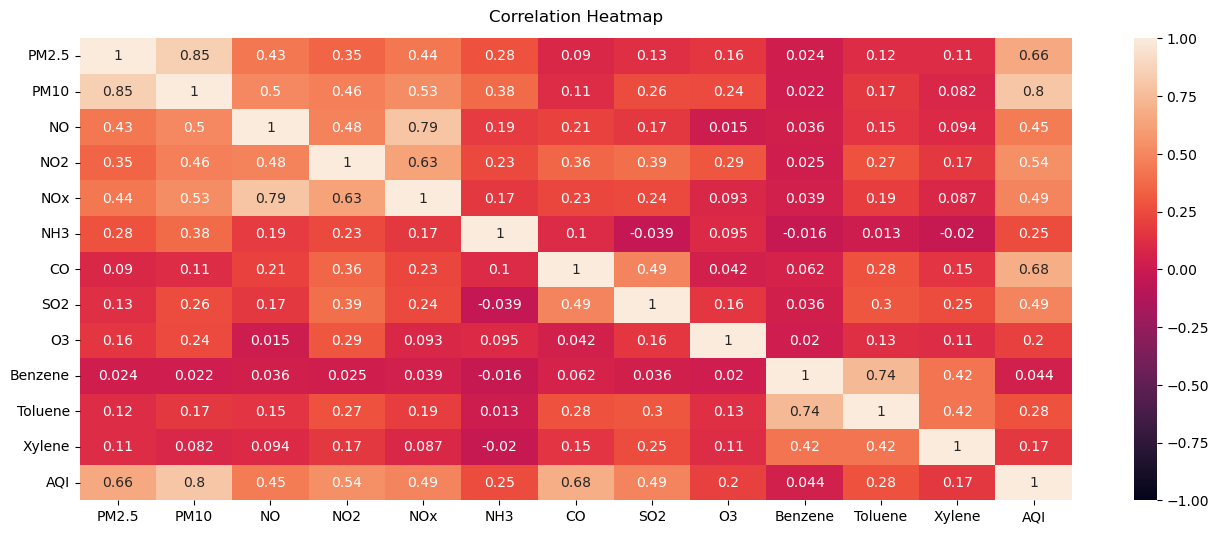

In [4]:

plt.figure(figsize=(16, 6))
heatmap=sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);

In [5]:
df.describe()

PM2.5          PM10            NO           NO2           NOx  \
count  24933.000000  18391.000000  25949.000000  25946.000000  25346.000000   
mean      67.450578    118.127103     17.574730     28.560659     32.309123   
std       64.661449     90.605110     22.785846     24.474746     31.646011   
min        0.040000      0.010000      0.020000      0.010000      0.000000   
25%       28.820000     56.255000      5.630000     11.750000     12.820000   
50%       48.570000     95.680000      9.890000     21.690000     23.520000   
75%       80.590000    149.745000     19.950000     37.620000     40.127500   
max      949.990000   1000.000000    390.680000    362.210000    467.630000   

                NH3            CO           SO2            O3       Benzene  \
count  19203.000000  27472.000000  25677.000000  25509.000000  23908.000000   
mean      23.483476      2.248598     14.531977     34.491430      3.280840   
std       25.684275      6.962884     18.133775     21.694928     15.811136   
min        0.010000      0.000000      0.010000      0.010000      0.000000   
25%        8.580000      0.510000      5.670000     18.860000      0.120000   
50%       15.850000      0.890000      9.160000     30.840000      1.070000   
75%       30.020000      1.450000     15.220000     45.570000      3.080000   
max      352.890000    175.810000    193.860000    257.730000    455.030000   

            Toluene        Xylene           AQI  
count  21490.000000  11422.000000  24850.000000  
mean       8.700972      3.070128    166.463581  
std       19.969164      6.323247    140.696585  
min        0.000000      0.000000     13.000000  
25%        0.600000      0.140000     81.000000  
50%        2.970000      0.980000    118.000000  
75%        9.150000      3.350000    208.000000  
max      454.850000    170.370000   2049.000000

In [6]:
df.sem()

C:\Users\Udhaya\AppData\Local\Temp\ipykernel_2856\1459226325.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.sem()


PM2.5      0.409504
PM10       0.668113
NO         0.141451
NO2        0.151944
NOx        0.198776
NH3        0.185346
CO         0.042009
SO2        0.113166
O3         0.135835
Benzene    0.102257
Toluene    0.136220
Xylene     0.059166
AQI        0.892525
dtype: float64

In [5]:
df.mode()

City        Date  PM2.5  PM10    NO    NO2  NOx   NH3   CO   SO2  \
0    Ahmedabad  2020-03-11   11.0  94.0  5.93  10.58  0.0  6.29  0.0  5.74   
1    Bengaluru  2020-03-12    NaN   NaN   NaN    NaN  NaN   NaN  NaN   NaN   
2      Chennai  2020-03-13    NaN   NaN   NaN    NaN  NaN   NaN  NaN   NaN   
3        Delhi  2020-03-14    NaN   NaN   NaN    NaN  NaN   NaN  NaN   NaN   
4      Lucknow  2020-03-15    NaN   NaN   NaN    NaN  NaN   NaN  NaN   NaN   
..         ...         ...    ...   ...   ...    ...  ...   ...  ...   ...   
108        NaN  2020-06-27    NaN   NaN   NaN    NaN  NaN   NaN  NaN   NaN   
109        NaN  2020-06-28    NaN   NaN   NaN    NaN  NaN   NaN  NaN   NaN   
110        NaN  2020-06-29    NaN   NaN   NaN    NaN  NaN   NaN  NaN   NaN   
111        NaN  2020-06-30    NaN   NaN   NaN    NaN  NaN   NaN  NaN   NaN   
112        NaN  2020-07-01    NaN   NaN   NaN    NaN  NaN   NaN  NaN   NaN   

        O3  Benzene  Toluene  Xylene    AQI AQI_Bucket  
0    16.48      0.0      0.0     0.0  102.0   Moderate  
1      NaN      NaN      NaN     NaN    NaN        NaN  
2      NaN      NaN      NaN     NaN    NaN        NaN  
3      NaN      NaN      NaN     NaN    NaN        NaN  
4      NaN      NaN      NaN     NaN    NaN        NaN  
..     ...      ...      ...     ...    ...        ...  
108    NaN      NaN      NaN     NaN    NaN        NaN  
109    NaN      NaN      NaN     NaN    NaN        NaN  
110    NaN      NaN      NaN     NaN    NaN        NaN  
111    NaN      NaN      NaN     NaN    NaN        NaN  
112    NaN      NaN      NaN     NaN    NaN        NaN  

[113 rows x 16 columns]

In [6]:
df.median()

C:\Users\Udhaya\AppData\Local\Temp\ipykernel_11104\530051474.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.median()


PM2.5       48.57
PM10        95.68
NO           9.89
NO2         21.69
NOx         23.52
NH3         15.85
CO           0.89
SO2          9.16
O3          30.84
Benzene      1.07
Toluene      2.97
Xylene       0.98
AQI        118.00
dtype: float64

In [7]:
df.var()

C:\Users\Udhaya\AppData\Local\Temp\ipykernel_2856\1568254755.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.var()


PM2.5       4181.103046
PM10        8209.285907
NO           519.194793
NO2          599.013182
NOx         1001.470008
NH3          659.681982
CO            48.481757
SO2          328.833790
O3           470.669909
Benzene      249.992035
Toluene      398.767497
Xylene        39.983458
AQI        19795.529057
dtype: float64

C:\Users\Udhaya\AppData\Local\Temp\ipykernel_14188\4033294746.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  skewness=df.skew()


PM2.5       3.369960
PM10        2.053189
NO          3.883166
NO2         2.464560
NOx         2.569915
NH3         4.083993
CO          8.878322
SO2         4.083660
O3          1.330119
Benzene    21.304218
Toluene    11.666129
Xylene      7.891515
AQI         3.396757
dtype: float64


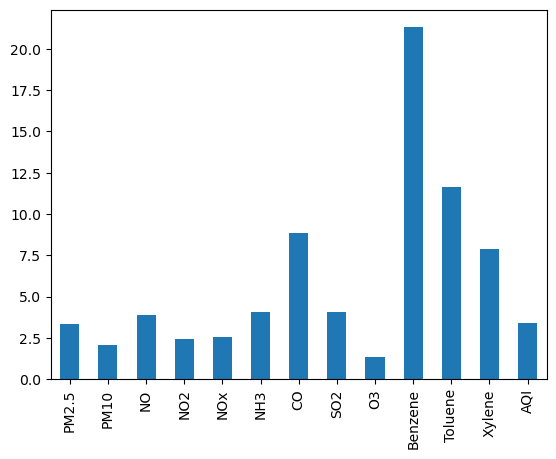

In [16]:
skewness=df.skew()
print(skewness)
skewness.plot(kind='bar')
plt.show()

C:\Users\Udhaya\AppData\Local\Temp\ipykernel_14188\1025669927.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  kurt = df.kurtosis()


PM2.5       21.132222
PM10         6.747873
NO          25.164347
NO2         11.211125
NOx         10.836335
NH3         27.964608
CO         109.488050
SO2         22.067101
O3           3.429465
Benzene    530.171471
Toluene    216.745507
Xylene     119.980116
AQI         21.423727
dtype: float64


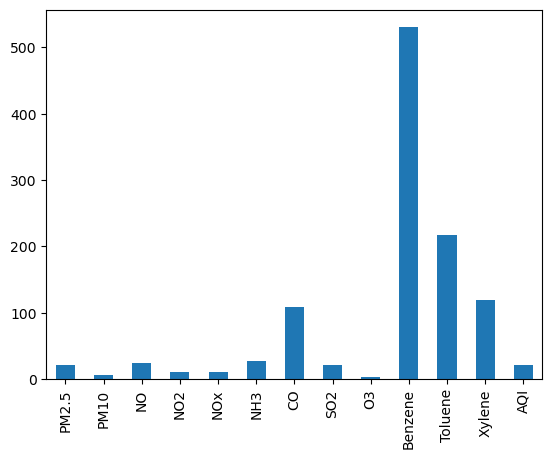

In [19]:
kurt = df.kurtosis()
print(kurt)
kurt.plot(kind='bar')
plt.show()

In [41]:
df.isnull().sum()

City              0
Date              0
PM2.5          4598
PM10          11140
NO             3582
NO2            3585
NOx            4185
NH3           10328
CO             2059
SO2            3854
O3             4022
Benzene        5623
Toluene        8041
Xylene        18109
AQI            4681
AQI_Bucket     4681
dtype: int64

In [6]:
plt.figure()
df.skew(axis = 0, skipna = True)


C:\Users\Udhaya\AppData\Local\Temp\ipykernel_4196\620761649.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.skew(axis = 0, skipna = True)


PM2.5       3.369960
PM10        2.053189
NO          3.883166
NO2         2.464560
NOx         2.569915
NH3         4.083993
CO          8.878322
SO2         4.083660
O3          1.330119
Benzene    21.304218
Toluene    11.666129
Xylene      7.891515
AQI         3.396757
dtype: float64

<Figure size 640x480 with 0 Axes>

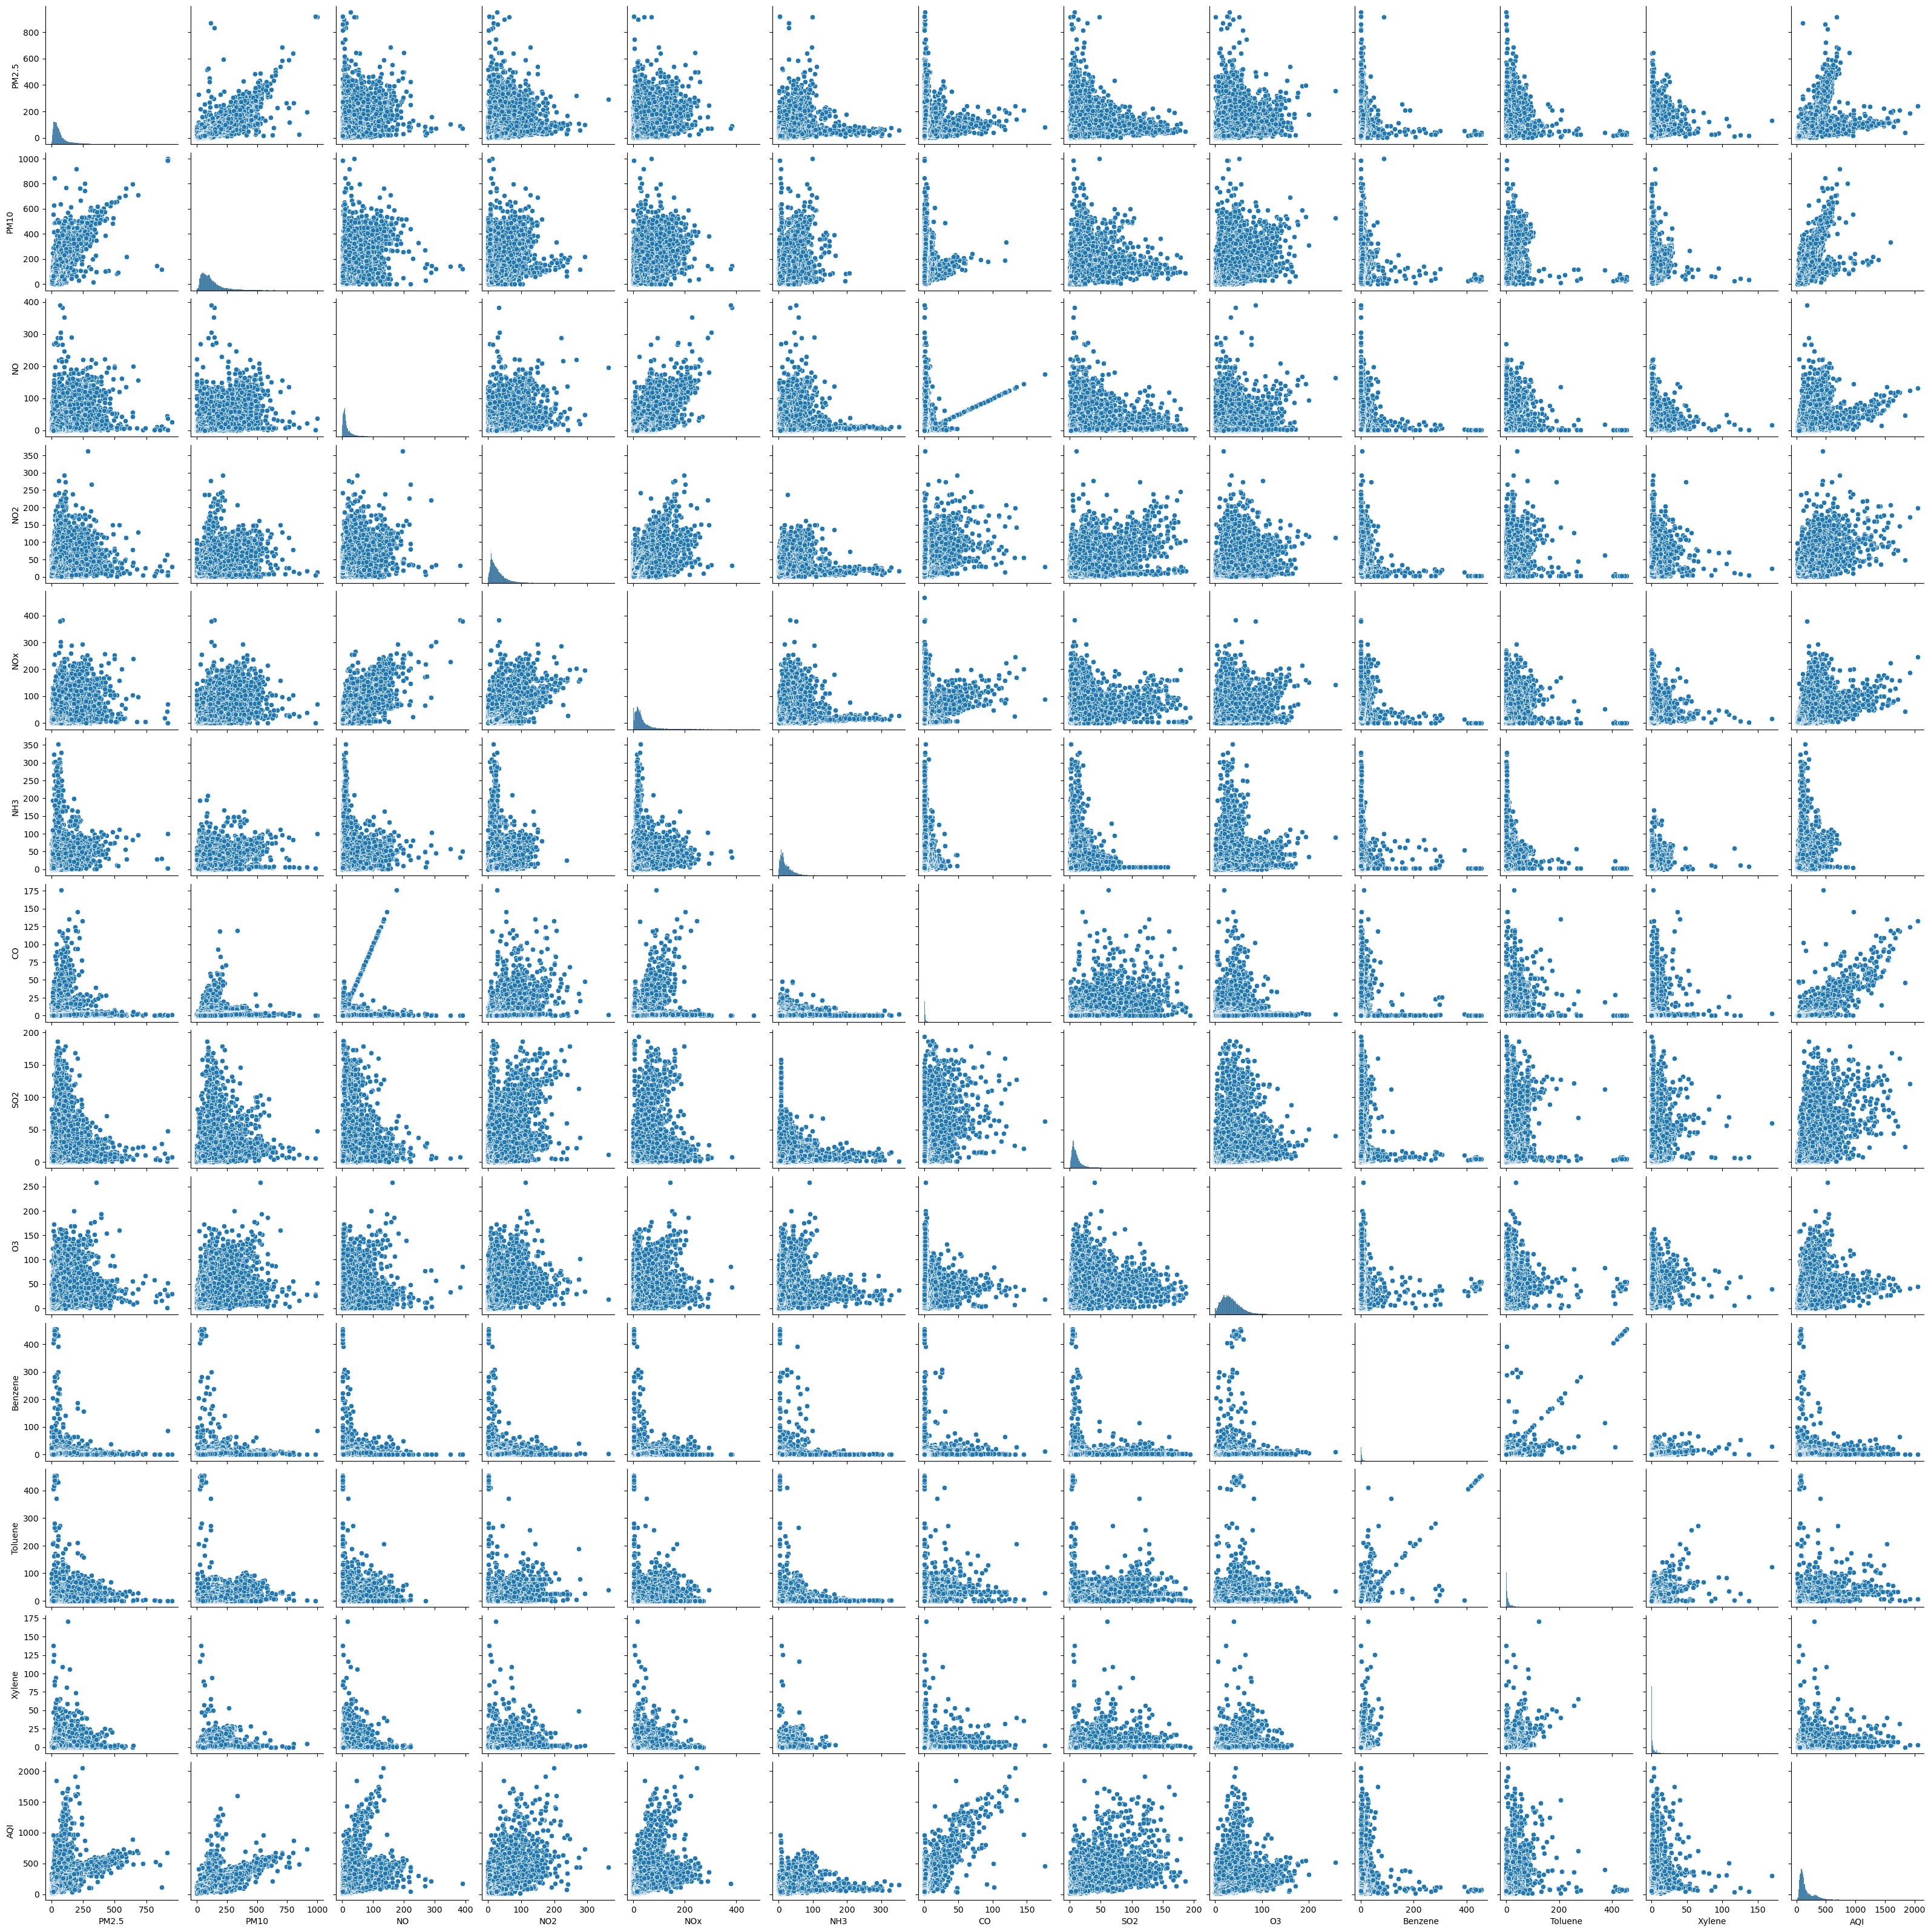

In [3]:
sns.pairplot(df);

In [42]:
df['Date'].apply(pd.to_datetime)
df.set_index('Date',inplace=True)

In [43]:
df

City  PM2.5   PM10     NO    NO2    NOx    NH3     CO  \
Date                                                                         
2015-01-01      Ahmedabad    NaN    NaN   0.92  18.22  17.15    NaN   0.92   
2015-01-02      Ahmedabad    NaN    NaN   0.97  15.69  16.46    NaN   0.97   
2015-01-03      Ahmedabad    NaN    NaN  17.40  19.30  29.70    NaN  17.40   
2015-01-04      Ahmedabad    NaN    NaN   1.70  18.48  17.97    NaN   1.70   
2015-01-05      Ahmedabad    NaN    NaN  22.10  21.42  37.76    NaN  22.10   
...                   ...    ...    ...    ...    ...    ...    ...    ...   
2020-06-27  Visakhapatnam  15.02  50.94   7.68  25.06  19.54  12.47   0.47   
2020-06-28  Visakhapatnam  24.38  74.09   3.42  26.06  16.53  11.99   0.52   
2020-06-29  Visakhapatnam  22.91  65.73   3.45  29.53  18.33  10.71   0.48   
2020-06-30  Visakhapatnam  16.64  49.97   4.05  29.26  18.80  10.03   0.52   
2020-07-01  Visakhapatnam  15.00  66.00   0.40  26.85  14.05   5.20   0.59   

              SO2      O3  Benzene  Toluene  Xylene   AQI    AQI_Bucket  
Date                                                                     
2015-01-01  27.64  133.36     0.00     0.02    0.00   NaN           NaN  
2015-01-02  24.55   34.06     3.68     5.50    3.77   NaN           NaN  
2015-01-03  29.07   30.70     6.80    16.40    2.25   NaN           NaN  
2015-01-04  18.59   36.08     4.43    10.14    1.00   NaN           NaN  
2015-01-05  39.33   39.31     7.01    18.89    2.78   NaN           NaN  
...           ...     ...      ...      ...     ...   ...           ...  
2020-06-27   8.55   23.30     2.24    12.07    0.73  41.0          Good  
2020-06-28  12.72   30.14     0.74     2.21    0.38  70.0  Satisfactory  
2020-06-29   8.42   30.96     0.01     0.01    0.00  68.0  Satisfactory  
2020-06-30   9.84   28.30     0.00     0.00    0.00  54.0  Satisfactory  
2020-07-01   2.10   17.05      NaN      NaN     NaN  50.0          Good  

[29531 rows x 15 columns]

In [44]:
df['PM2.5'] = df['PM2.5'].fillna(df.groupby('City')['PM2.5'].transform('mean'))
df['PM10'] = df['PM10'].fillna(df.groupby('City')['PM10'].transform('mean'))
df['NO'] = df['NO'].fillna(df.groupby('City')['NO'].transform('mean'))
df['NO2'] = df['NO2'].fillna(df.groupby('City')['NO2'].transform('mean'))
df['NOx'] = df['NOx'].fillna(df.groupby('City')['NOx'].transform('mean'))
df['NH3'] = df['NH3'].fillna(df.groupby('City')['NH3'].transform('mean'))
df['CO'] = df['CO'].fillna(df.groupby('City')['CO'].transform('mean'))
df['SO2'] = df['SO2'].fillna(df.groupby('City')['SO2'].transform('mean'))
df['O3'] = df['O3'].fillna(df.groupby('City')['O3'].transform('mean'))
df['Benzene'] = df['Benzene'].fillna(df.groupby('City')['Benzene'].transform('mean'))
df['Toluene'] = df['Toluene'].fillna(df.groupby('City')['Toluene'].transform('mean'))
df['Xylene'] = df['Xylene'].fillna(df.groupby('City')['Xylene'].transform('mean'))


In [45]:
df.isnull().sum()

City              0
PM2.5             0
PM10           2009
NO                0
NO2               0
NOx            1169
NH3            2009
CO                0
SO2               0
O3              162
Benzene        2732
Toluene        4010
Xylene        13047
AQI            4681
AQI_Bucket     4681
dtype: int64

In [46]:
df['PM2.5']=df['PM2.5'].fillna((df['PM2.5'].median()))
df['PM10']=df['PM10'].fillna((df['PM10'].median()))
df['NO']=df['NO'].fillna((df['NO'].median()))
df['NO2']=df['NO2'].fillna((df['NO2'].median()))
df['NOx']=df['NOx'].fillna((df['NOx'].median()))
df['NH3']=df['NH3'].fillna((df['NH3'].median()))
df['CO']=df['CO'].fillna((df['CO'].median()))
df['SO2']=df['SO2'].fillna((df['SO2'].median()))
df['O3']=df['O3'].fillna((df['O3'].median()))
df['Benzene']=df['Benzene'].fillna((df['Benzene'].median()))
df['Toluene']=df['Toluene'].fillna((df['Toluene'].median()))
df['Xylene']=df['Xylene'].fillna((df['Xylene'].median()))

In [47]:
df.isnull().sum()

City             0
PM2.5            0
PM10             0
NO               0
NO2              0
NOx              0
NH3              0
CO               0
SO2              0
O3               0
Benzene          0
Toluene          0
Xylene           0
AQI           4681
AQI_Bucket    4681
dtype: int64

In [48]:
def get_PM10_subindex(x):
    if x <= 50:
        return x
    elif x > 50 and x <= 100:
        return x
    elif x > 100 and x <= 250:
        return 100 + (x - 100) * 100 / 150
    elif x > 250 and x <= 350:
        return 200 + (x - 250)
    elif x > 350 and x <= 430:
        return 300 + (x - 350) * 100 / 80
    elif x > 430:
        return 400 + (x - 430) * 100 / 80
    else:
        return 0


In [49]:
df["PM10_SubIndex"] = df["PM10"].astype(int).apply(lambda x: get_PM10_subindex(x))

In [50]:
def get_PM25_subindex(x):
    if x <= 30:
        return x * 50 / 30
    elif x > 30 and x <= 60:
        return 50 + (x - 30) * 50 / 30
    elif x > 60 and x <= 90:
        return 100 + (x - 60) * 100 / 30
    elif x > 90 and x <= 120:
        return 200 + (x - 90) * 100 / 30
    elif x > 120 and x <= 250:
        return 300 + (x - 120) * 100 / 130
    elif x > 250:
        return 400 + (x - 250) * 100 / 130
    else:
        return 0

df["PM2.5_SubIndex"] = df["PM2.5"].astype(int).apply(lambda x: get_PM25_subindex(x))

In [51]:
def get_SO2_subindex(x):
    if x <= 40:
        return x * 50 / 40
    elif x > 40 and x <= 80:
        return 50 + (x - 40) * 50 / 40
    elif x > 80 and x <= 380:
        return 100 + (x - 80) * 100 / 300
    elif x > 380 and x <= 800:
        return 200 + (x - 380) * 100 / 420
    elif x > 800 and x <= 1600:
        return 300 + (x - 800) * 100 / 800
    elif x > 1600:
        return 400 + (x - 1600) * 100 / 800
    else:
        return 0

df["SO2_SubIndex"] = df["SO2"].astype(int).apply(lambda x: get_SO2_subindex(x))

In [52]:
def get_NOx_subindex(x):
    if x <= 40:
        return x * 50 / 40
    elif x > 40 and x <= 80:
        return 50 + (x - 40) * 50 / 40
    elif x > 80 and x <= 180:
        return 100 + (x - 80) * 100 / 100
    elif x > 180 and x <= 280:
        return 200 + (x - 180) * 100 / 100
    elif x > 280 and x <= 400:
        return 300 + (x - 280) * 100 / 120
    elif x > 400:
        return 400 + (x - 400) * 100 / 120
    else:
        return 0

df["NOx_SubIndex"] = df["NOx"].astype(int).apply(lambda x: get_NOx_subindex(x))

In [53]:
def get_NH3_subindex(x):
    if x <= 200:
        return x * 50 / 200
    elif x > 200 and x <= 400:
        return 50 + (x - 200) * 50 / 200
    elif x > 400 and x <= 800:
        return 100 + (x - 400) * 100 / 400
    elif x > 800 and x <= 1200:
        return 200 + (x - 800) * 100 / 400
    elif x > 1200 and x <= 1800:
        return 300 + (x - 1200) * 100 / 600
    elif x > 1800:
        return 400 + (x - 1800) * 100 / 600
    else:
        return 0

df["NH3_SubIndex"] = df["NH3"].astype(int).apply(lambda x: get_NH3_subindex(x))

In [54]:
def get_CO_subindex(x):
    if x <= 1:
        return x * 50 / 1
    elif x > 1 and x <= 2:
        return 50 + (x - 1) * 50 / 1
    elif x > 2 and x <= 10:
        return 100 + (x - 2) * 100 / 8
    elif x > 10 and x <= 17:
        return 200 + (x - 10) * 100 / 7
    elif x > 17 and x <= 34:
        return 300 + (x - 17) * 100 / 17
    elif x > 34:
        return 400 + (x - 34) * 100 / 17
    else:
        return 0

df["CO_SubIndex"] = df["CO"].astype(int).apply(lambda x: get_CO_subindex(x))

In [55]:
def get_O3_subindex(x):
    if x <= 50:
        return x * 50 / 50
    elif x > 50 and x <= 100:
        return 50 + (x - 50) * 50 / 50
    elif x > 100 and x <= 168:
        return 100 + (x - 100) * 100 / 68
    elif x > 168 and x <= 208:
        return 200 + (x - 168) * 100 / 40
    elif x > 208 and x <= 748:
        return 300 + (x - 208) * 100 / 539
    elif x > 748:
        return 400 + (x - 400) * 100 / 539
    else:
        return 0

df["O3_SubIndex"] = df["O3"].astype(int).apply(lambda x: get_O3_subindex(x))

In [56]:
df1=df[["PM2.5_SubIndex", "PM10_SubIndex", "SO2_SubIndex", "NOx_SubIndex","NH3_SubIndex", "CO_SubIndex", "O3_SubIndex"]].max(axis=1)

In [57]:
df

City      PM2.5        PM10     NO    NO2    NOx    NH3  \
Date                                                                           
2015-01-01      Ahmedabad  67.854497  114.584029   0.92  18.22  17.15  18.21   
2015-01-02      Ahmedabad  67.854497  114.584029   0.97  15.69  16.46  18.21   
2015-01-03      Ahmedabad  67.854497  114.584029  17.40  19.30  29.70  18.21   
2015-01-04      Ahmedabad  67.854497  114.584029   1.70  18.48  17.97  18.21   
2015-01-05      Ahmedabad  67.854497  114.584029  22.10  21.42  37.76  18.21   
...                   ...        ...         ...    ...    ...    ...    ...   
2020-06-27  Visakhapatnam  15.020000   50.940000   7.68  25.06  19.54  12.47   
2020-06-28  Visakhapatnam  24.380000   74.090000   3.42  26.06  16.53  11.99   
2020-06-29  Visakhapatnam  22.910000   65.730000   3.45  29.53  18.33  10.71   
2020-06-30  Visakhapatnam  16.640000   49.970000   4.05  29.26  18.80  10.03   
2020-07-01  Visakhapatnam  15.000000   66.000000   0.40  26.85  14.05   5.20   

               CO    SO2      O3  ...    Xylene   AQI    AQI_Bucket  \
Date                              ...                                 
2015-01-01   0.92  27.64  133.36  ...  0.000000   NaN           NaN   
2015-01-02   0.97  24.55   34.06  ...  3.770000   NaN           NaN   
2015-01-03  17.40  29.07   30.70  ...  2.250000   NaN           NaN   
2015-01-04   1.70  18.59   36.08  ...  1.000000   NaN           NaN   
2015-01-05  22.10  39.33   39.31  ...  2.780000   NaN           NaN   
...           ...    ...     ...  ...       ...   ...           ...   
2020-06-27   0.47   8.55   23.30  ...  0.730000  41.0          Good   
2020-06-28   0.52  12.72   30.14  ...  0.380000  70.0  Satisfactory   
2020-06-29   0.48   8.42   30.96  ...  0.000000  68.0  Satisfactory   
2020-06-30   0.52   9.84   28.30  ...  0.000000  54.0  Satisfactory   
2020-07-01   0.59   2.10   17.05  ...  2.790456  50.0          Good   

            PM10_SubIndex PM2.5_SubIndex  SO2_SubIndex  NOx_SubIndex  \
Date                                                                   
2015-01-01     109.333333     123.333333         33.75         21.25   
2015-01-02     109.333333     123.333333         30.00         20.00   
2015-01-03     109.333333     123.333333         36.25         36.25   
2015-01-04     109.333333     123.333333         22.50         21.25   
2015-01-05     109.333333     123.333333         48.75         46.25   
...                   ...            ...           ...           ...   
2020-06-27      50.000000      25.000000         10.00         23.75   
2020-06-28      74.000000      40.000000         15.00         20.00   
2020-06-29      65.000000      36.666667         10.00         22.50   
2020-06-30      49.000000      26.666667         11.25         22.50   
2020-07-01      66.000000      25.000000          2.50         17.50   

            NH3_SubIndex  CO_SubIndex  O3_SubIndex  
Date                                                
2015-01-01          4.50     0.000000   148.529412  
2015-01-02          4.50     0.000000    34.000000  
2015-01-03          4.50   300.000000    30.000000  
2015-01-04          4.50    50.000000    36.000000  
2015-01-05          4.50   329.411765    39.000000  
...                  ...          ...          ...  
2020-06-27          3.00     0.000000    23.000000  
2020-06-28          2.75     0.000000    30.000000  
2020-06-29          2.50     0.000000    30.000000  
2020-06-30          2.50     0.000000    28.000000  
2020-07-01          1.25     0.000000    17.000000  

[29531 rows x 22 columns]

In [58]:
df["AQI"] = df["AQI"].fillna(round(df[["PM2.5_SubIndex", "PM10_SubIndex", "SO2_SubIndex", "NOx_SubIndex","NH3_SubIndex", "CO_SubIndex", "O3_SubIndex"]].max(axis=1)))

In [61]:
df

City      PM2.5        PM10     NO    NO2    NOx    NH3  \
Date                                                                           
2015-01-01      Ahmedabad  67.854497  114.584029   0.92  18.22  17.15  18.21   
2015-01-02      Ahmedabad  67.854497  114.584029   0.97  15.69  16.46  18.21   
2015-01-03      Ahmedabad  67.854497  114.584029  17.40  19.30  29.70  18.21   
2015-01-04      Ahmedabad  67.854497  114.584029   1.70  18.48  17.97  18.21   
2015-01-05      Ahmedabad  67.854497  114.584029  22.10  21.42  37.76  18.21   
...                   ...        ...         ...    ...    ...    ...    ...   
2020-06-27  Visakhapatnam  15.020000   50.940000   7.68  25.06  19.54  12.47   
2020-06-28  Visakhapatnam  24.380000   74.090000   3.42  26.06  16.53  11.99   
2020-06-29  Visakhapatnam  22.910000   65.730000   3.45  29.53  18.33  10.71   
2020-06-30  Visakhapatnam  16.640000   49.970000   4.05  29.26  18.80  10.03   
2020-07-01  Visakhapatnam  15.000000   66.000000   0.40  26.85  14.05   5.20   

               CO    SO2      O3  ...    Xylene    AQI    AQI_Bucket  \
Date                              ...                                  
2015-01-01   0.92  27.64  133.36  ...  0.000000  149.0      Moderate   
2015-01-02   0.97  24.55   34.06  ...  3.770000  123.0      Moderate   
2015-01-03  17.40  29.07   30.70  ...  2.250000  300.0          Poor   
2015-01-04   1.70  18.59   36.08  ...  1.000000  123.0      Moderate   
2015-01-05  22.10  39.33   39.31  ...  2.780000  329.0     Very Poor   
...           ...    ...     ...  ...       ...    ...           ...   
2020-06-27   0.47   8.55   23.30  ...  0.730000   41.0          Good   
2020-06-28   0.52  12.72   30.14  ...  0.380000   70.0  Satisfactory   
2020-06-29   0.48   8.42   30.96  ...  0.000000   68.0  Satisfactory   
2020-06-30   0.52   9.84   28.30  ...  0.000000   54.0  Satisfactory   
2020-07-01   0.59   2.10   17.05  ...  2.790456   50.0          Good   

            PM10_SubIndex PM2.5_SubIndex  SO2_SubIndex  NOx_SubIndex  \
Date                                                                   
2015-01-01     109.333333     123.333333         33.75         21.25   
2015-01-02     109.333333     123.333333         30.00         20.00   
2015-01-03     109.333333     123.333333         36.25         36.25   
2015-01-04     109.333333     123.333333         22.50         21.25   
2015-01-05     109.333333     123.333333         48.75         46.25   
...                   ...            ...           ...           ...   
2020-06-27      50.000000      25.000000         10.00         23.75   
2020-06-28      74.000000      40.000000         15.00         20.00   
2020-06-29      65.000000      36.666667         10.00         22.50   
2020-06-30      49.000000      26.666667         11.25         22.50   
2020-07-01      66.000000      25.000000          2.50         17.50   

            NH3_SubIndex  CO_SubIndex  O3_SubIndex  
Date                                                
2015-01-01          4.50     0.000000   148.529412  
2015-01-02          4.50     0.000000    34.000000  
2015-01-03          4.50   300.000000    30.000000  
2015-01-04          4.50    50.000000    36.000000  
2015-01-05          4.50   329.411765    39.000000  
...                  ...          ...          ...  
2020-06-27          3.00     0.000000    23.000000  
2020-06-28          2.75     0.000000    30.000000  
2020-06-29          2.50     0.000000    30.000000  
2020-06-30          2.50     0.000000    28.000000  
2020-07-01          1.25     0.000000    17.000000  

[29531 rows x 22 columns]

In [60]:
def get_AQI_bucket(x):
    if x <= 50:
        return "Good"
    elif x > 50 and x <= 100:
        return "Satisfactory"
    elif x > 100 and x <= 200:
        return "Moderate"
    elif x > 200 and x <= 300:
        return "Poor"
    elif x > 300 and x <= 400:
        return "Very Poor"
    elif x > 400:
        return "Severe"
    else:
        return '0'
    
df["AQI_Bucket"] = df["AQI_Bucket"].fillna(df["AQI"].apply(lambda x: get_AQI_bucket(x)))

In [31]:
df.isnull().sum()

City              0
PM2.5             0
PM10              0
NO                0
NO2               0
NOx               0
NH3               0
CO                0
SO2               0
O3                0
Benzene           0
Toluene           0
Xylene            0
AQI               0
AQI_Bucket        0
PM10_SubIndex     0
PM2.5_SubIndex    0
SO2_SubIndex      0
NOx_SubIndex      0
NH3_SubIndex      0
CO_SubIndex       0
O3_SubIndex       0
dtype: int64

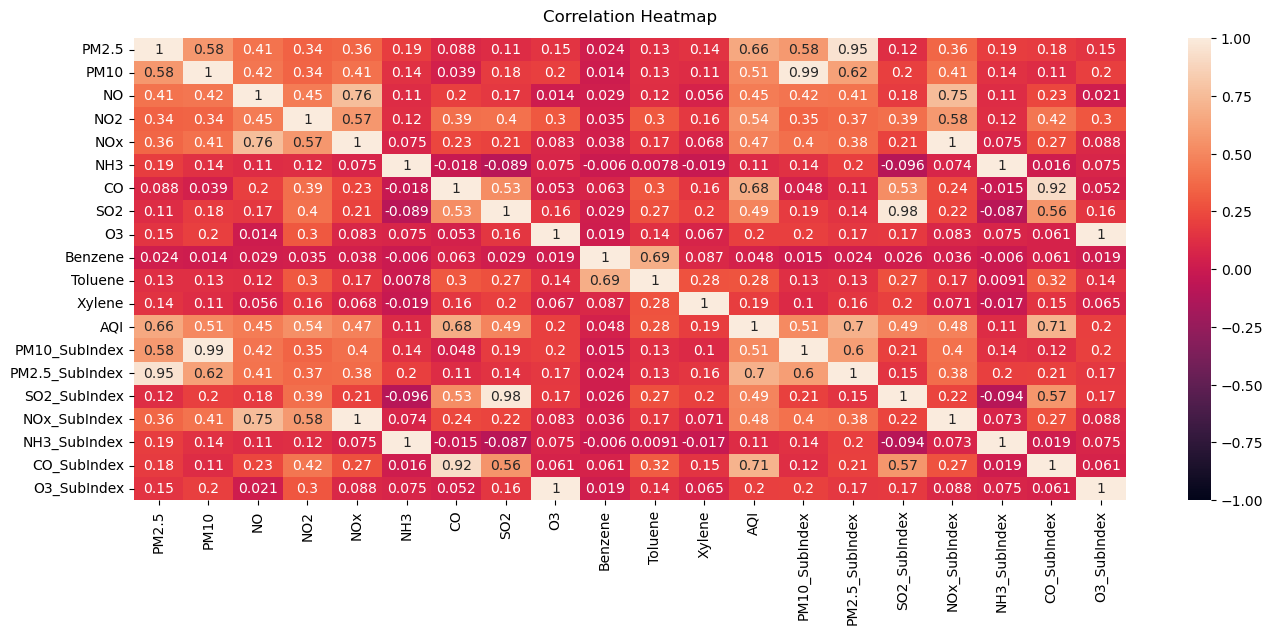

In [23]:
plt.figure(figsize=(16, 6))
heatmap=sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);


Distribution of different pollutants in last 5 years


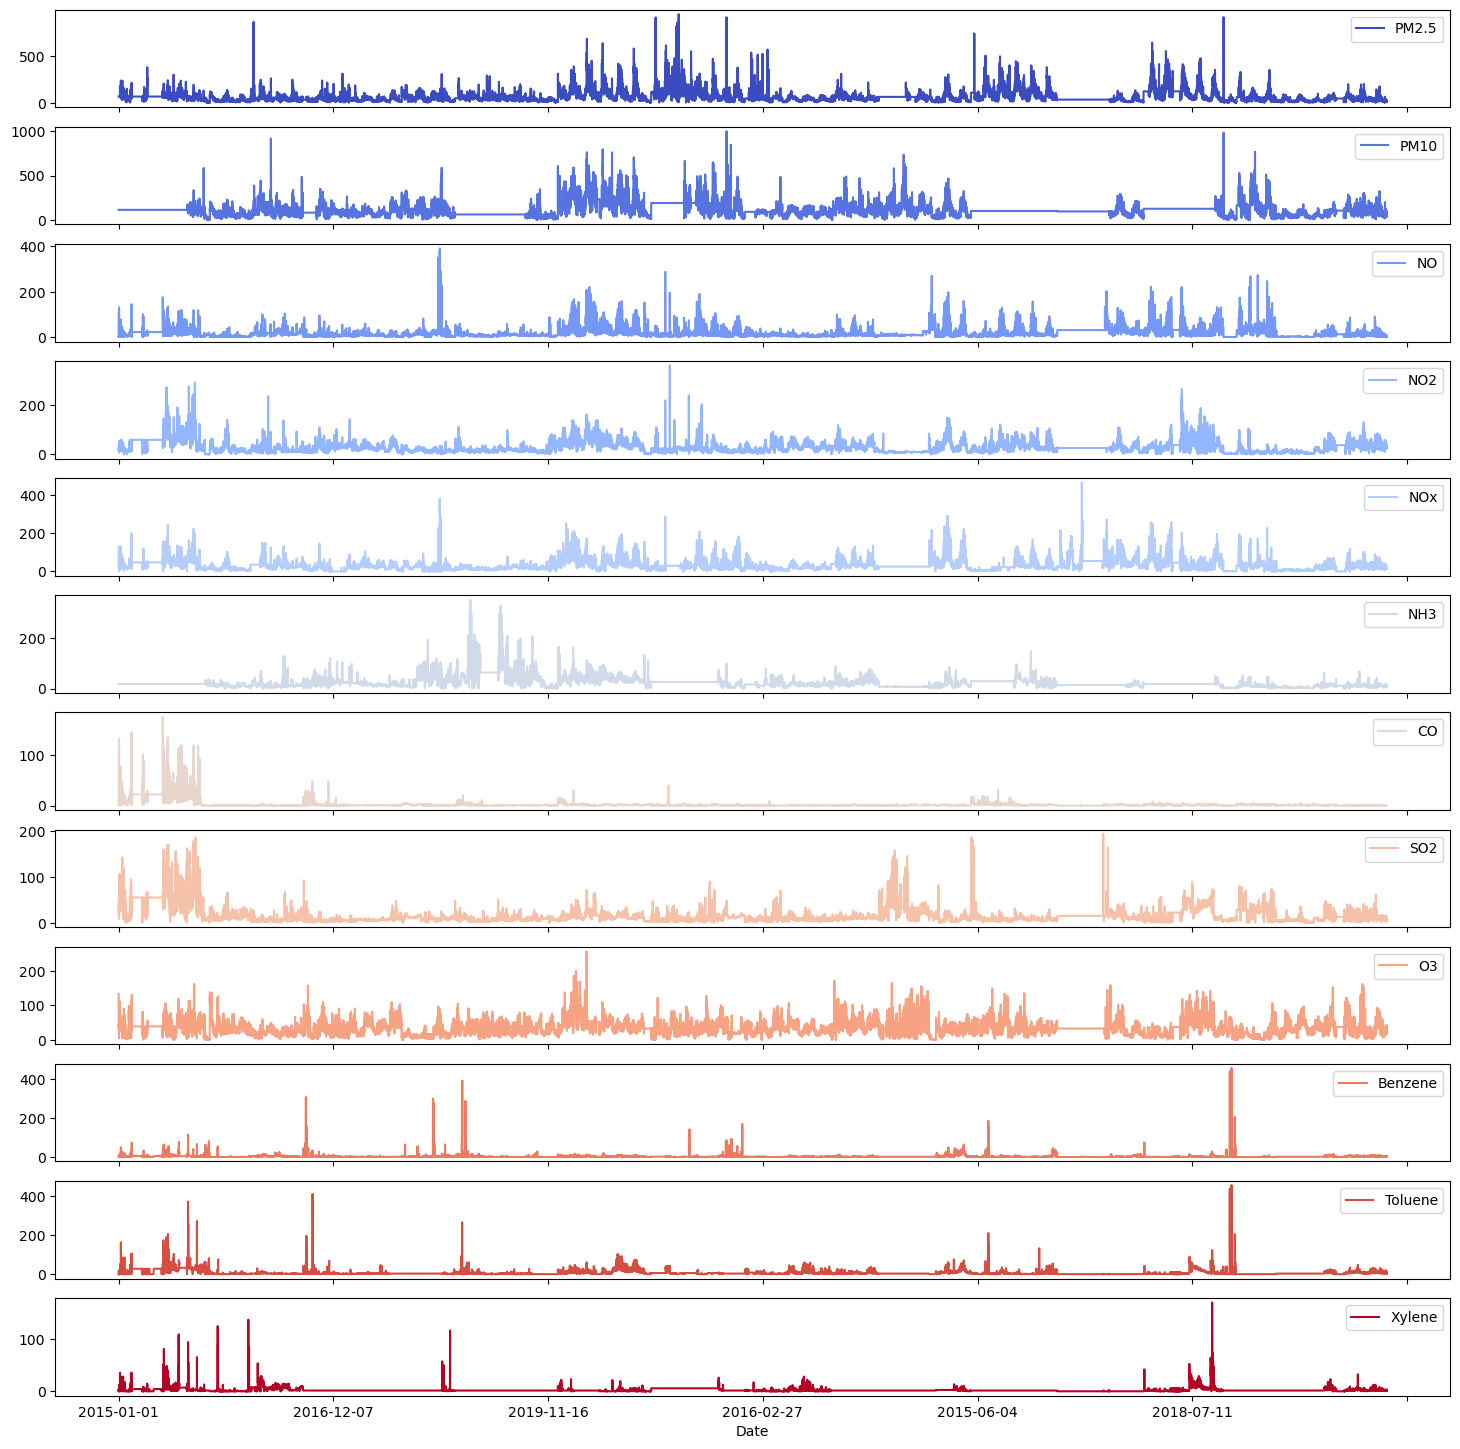

In [167]:
pollutants = ['PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2','O3', 'Benzene', 'Toluene', 'Xylene']
df_city_day = df_city_day[pollutants]

print('Distribution of different pollutants in last 5 years')
df_city_day.plot(kind='line',figsize=(18,18),cmap='coolwarm',subplots=True,fontsize=10);

In [165]:
df_city_day = df.copy()
df_city_day.columns

Index(['City', 'PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2', 'O3',
       'Benzene', 'Toluene', 'Xylene', 'AQI', 'AQI_Bucket', 'PM10_SubIndex',
       'PM2.5_SubIndex', 'SO2_SubIndex', 'NOx_SubIndex', 'NH3_SubIndex',
       'CO_SubIndex', 'O3_SubIndex'],
      dtype='object')

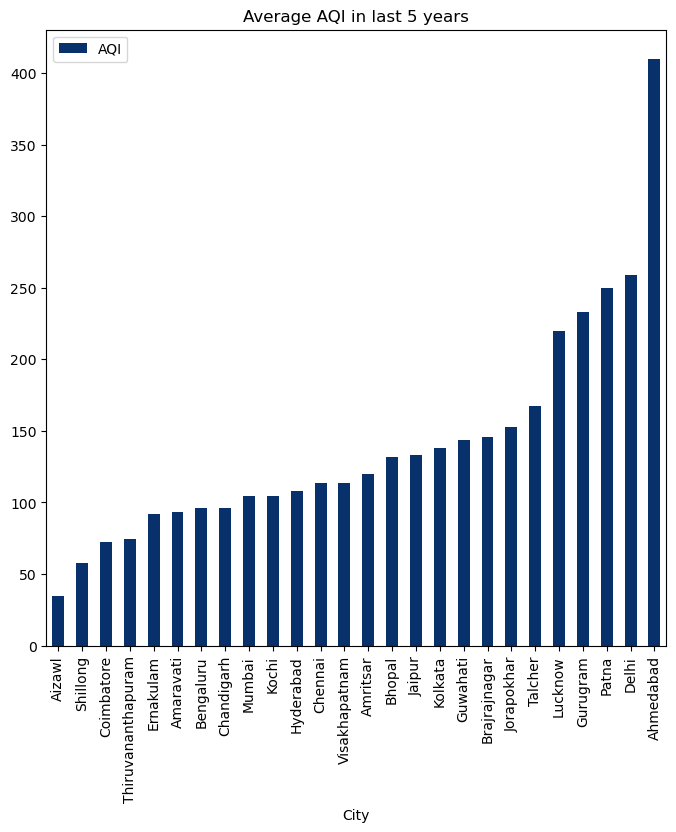

In [168]:
df[['City','AQI']].groupby('City').mean().sort_values('AQI').plot(kind='bar',cmap='Blues_r',figsize=(8,8))
plt.title('Average AQI in last 5 years');

In [62]:
final_df= df[['AQI', 'AQI_Bucket']].copy()
final_df

AQI    AQI_Bucket
Date                           
2015-01-01  149.0      Moderate
2015-01-02  123.0      Moderate
2015-01-03  300.0          Poor
2015-01-04  123.0      Moderate
2015-01-05  329.0     Very Poor
...           ...           ...
2020-06-27   41.0          Good
2020-06-28   70.0  Satisfactory
2020-06-29   68.0  Satisfactory
2020-06-30   54.0  Satisfactory
2020-07-01   50.0          Good

[29531 rows x 2 columns]

In [170]:
final_df['AQI_Bucket'].unique()

array(['Moderate', 'Poor', 'Very Poor', 'Severe', 'Satisfactory', 'Good'],
      dtype=object)

In [171]:
final_df['AQI_Bucket'] = final_df['AQI_Bucket'].map({'Good' :0, 'Satisfactory' :1, 'Moderate' :2, 'Poor' :3, 'Very Poor' :4, 'Severe' :5}).astype(int) #mapping numbers
final_df.head()

AQI  AQI_Bucket
Date                         
2015-01-01  149.0           2
2015-01-02  123.0           2
2015-01-03  300.0           3
2015-01-04  123.0           2
2015-01-05  329.0           4

In [172]:
X = final_df[['AQI']]
y = final_df[['AQI_Bucket']]

In [67]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import  train_test_split

In [174]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=40)

In [175]:
clf = RandomForestClassifier(random_state = 0).fit(X_train, y_train)

C:\Users\Udhaya\AppData\Local\Temp\ipykernel_4196\256799545.py:1: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



In [177]:
predicted = clf.predict(X_test)
predicted

array([1, 4, 1, ..., 2, 4, 4])

In [179]:
clf.score(X_train, y_train)

1.0

In [183]:
accuracy_score(y_test,predicted)

1.0

In [116]:
X1=df[["PM2.5", "PM10", "SO2", "NOx","NH3", "CO", "O3", 'Benzene', 'Toluene', 'Xylene']]
y1=df[['AQI']]

In [117]:
X_train, X_test, y_train, y_test = train_test_split(X1, y1, test_size=0.3, random_state=40)

In [69]:
RF=RandomForestRegressor().fit(X_train,y_train)

C:\Users\Udhaya\AppData\Local\Temp\ipykernel_12884\1375575360.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RF=RandomForestRegressor().fit(X_train,y_train)


In [99]:
predicted = RF.predict(X_test)
predicted

array([101.09, 304.47,  50.46, ...,  98.63, 343.99, 232.56])

In [89]:
print('Root Squared Error :',format(np.sqrt( mean_squared_error(y_test,predicted))))
print('R_squared:',r2_score(y_test,predicted))
print("Mean absolute error :", mean_absolute_error(y_test,predicted))

Root Squared Error : 44.80011823252227
R_squared: 0.8966898769416526
Mean absolute error : 19.699627246178697


In [100]:
accuracy=RF.score(X_test,y_test)
accuracy

0.8966898769416526

In [94]:
from matplotlib import pyplot

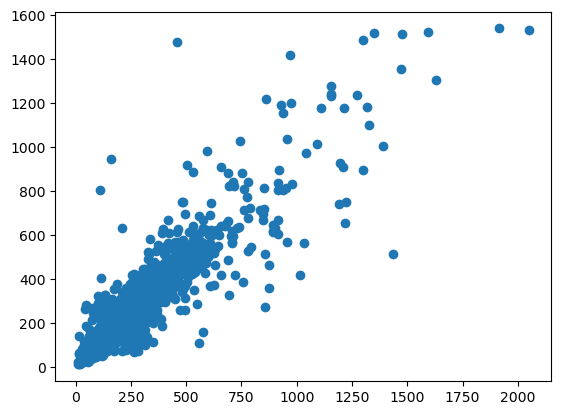

In [101]:
plt.scatter(y_test,predicted)

In [108]:
DT=DecisionTreeRegressor()
DT.fit(X_train,y_train)

DecisionTreeRegressor()

In [105]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor

In [109]:
predicted = DT.predict(X_test)
predicted

array([104., 308.,  40., ...,  93., 366., 259.])

In [110]:
print('Root Squared Error :',format(np.sqrt( mean_squared_error(y_test,predicted))))
print('R_squared:',r2_score(y_test,predicted))
print("Mean absolute error :", mean_absolute_error(y_test,predicted))

Root Squared Error : 58.11123295823255
R_squared: 0.8261780015835865
Mean absolute error : 27.061183866252268


In [113]:
linreg=LinearRegression()
linreg.fit(X_train,y_train)

LinearRegression()

In [114]:
predicted = linreg.predict(X_test)
predicted

array([[149.45838843],
       [253.22726729],
       [ 61.51070725],
       ...,
       [109.27831403],
       [299.35681205],
       [220.31016079]])

In [115]:
print('Root Squared Error :',format(np.sqrt( mean_squared_error(y_test,predicted))))
print('R_squared:',r2_score(y_test,predicted))
print("Mean absolute error :", mean_absolute_error(y_test,predicted))

Root Squared Error : 60.29412322705617
R_squared: 0.8128738307776499
Mean absolute error : 31.447058699759666
